1. Pasos generales que seguiremos:
    - Preparación de datos: Cargar y preprocesar las imágenes.
    - Construcción del modelo: Crear una red neuronal convolucional (CNN) o usar un modelo preentrenado (transfer learning).
    - Entrenamiento: Entrenar el modelo con los datos.
    - Guardar el modelo: Exportar el modelo entrenado para su uso futuro.
    - Evaluación: Probar el modelo con datos nuevos.

2. Herramientas que usaremos:
    - TensorFlow/Keras: Para construir y entrenar el modelo.
    - OpenCV/PIL: Para el procesamiento de imágenes.
    - NumPy: Para manipulación de datos.
    - Matplotlib/Seaborn: Para visualización.

### Librerias necesarias:

- pip install pandas
- pip install scikit-learn
- pip install imblearn
- pip install seaborn
- pip install torch
- pip install torchvision

1. Cargar el archivo .csv

Puedes usar la biblioteca pandas para cargar el archivo .csv y manipular los datos.

In [3]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('data/fotos_siniestros/clasificacion_fotos_siniestros_partes.csv', sep='|')

# Mostrar las primeras filas para verificar
print(df.head())

  Imagen    Tipos de Daño              Piezas del Vehículo  Sugerencia
0  1.jpg  Abolladura-dent  Guardabarros delantero derecho      Reparar
1  2.jpg  Abolladura-dent              Parachoques trasero     Reparar
2  3.jpg  Arañazo-scratch            Parachoques delantero     Reparar
3  4.jpg     Rotura-crack                           Rueda      Reparar
4  5.jpg     Rotura-crack               Parabrisas trasero  Reemplazar


2. Preprocesar los datos

Antes de entrenar un modelo, es importante preprocesar los datos. Aquí hay algunas acciones que podrías realizar:
a. Limpieza de datos

    Verifica si hay valores nulos o duplicados.

    Corrige errores tipográficos o inconsistencias (por ejemplo, "Parabrisas delantero" vs. "Parabrisas delantero").

In [4]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar filas duplicadas (si es necesario)
df = df.drop_duplicates()

# Corregir inconsistencias (ejemplo)
df['Piezas del Vehículo'] = df['Piezas del Vehículo'].str.strip()  # Eliminar espacios en blanco

Imagen                 0
Tipos de Daño          0
Piezas del Vehículo    0
Sugerencia             0
dtype: int64


b. Codificación de variables categóricas

    Las columnas como Tipos de Daño, Piezas del Vehículo y Sugerencia son categóricas. Debes convertirlas en formatos numéricos para que el modelo pueda procesarlas.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Codificar variables categóricas
label_encoders = {}
for column in ['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Guardar los encoders para usarlos después

In [11]:
print(label_encoders)

{'Tipos de Daño': LabelEncoder(), 'Piezas del Vehículo': LabelEncoder(), 'Sugerencia': LabelEncoder()}


In [ ]:
df.head(20)

,Imagen,Tipos de Daño,Piezas del Vehículo,Sugerencia
0,1.jpg,0,8,1
1,2.jpg,0,31,1
2,3.jpg,1,30,1
3,4.jpg,7,37,1
4,5.jpg,7,29,0
5,6.jpg,1,31,1
6,7.jpg,7,28,0
7,8.jpg,7,28,0
8,9.jpg,7,28,0
9,9.jpg,3,3,1


c. Separar características (features) y etiquetas (labels)

    Las características serán las columnas Tipos de Daño y Piezas del Vehículo.

    La etiqueta será la columna Sugerencia.

In [7]:
# Separar características y etiquetas
X = df[['Tipos de Daño', 'Piezas del Vehículo']]
y = df['Sugerencia']

In [8]:
print(X)

      Tipos de Daño  Piezas del Vehículo
0                 0                    8
1                 0                   31
2                 1                   30
3                 7                   37
4                 7                   29
...             ...                  ...
1596              4                   12
1597              0                   10
1598              0                   32
1599              1                   30
1600              1                   30

[1600 rows x 2 columns]


3. Dividir los datos en conjuntos de entrenamiento y prueba

Es importante dividir los datos en un conjunto de entrenamiento y otro de prueba para evaluar el rendimiento del modelo.

In [5]:
from sklearn.model_selection import train_test_split

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Entrenar un modelo

Puedes usar algoritmos como Árboles de Decisión, Random Forest, o Redes Neuronales, dependiendo de la complejidad del problema.
Ejemplo con Random Forest:

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.95


5. Guardar el modelo entrenado

Una vez que el modelo esté entrenado, puedes guardarlo para usarlo en el futuro sin necesidad de volver a entrenarlo.

In [7]:
import joblib

# Guardar el modelo
joblib.dump(model, 'modelo_entrenado_verificacionDannos.pkl')

# Guardar los label encoders (para decodificar las predicciones)
joblib.dump(label_encoders, 'label_encoders_verificacionDannos.pkl')

['label_encoders_verificacionDannos.pkl']

Pasos para generar la matriz de confusión

    Cargar el modelo y los datos de prueba:
    Si ya tienes el modelo entrenado y guardado, así como los datos de prueba (X_test y y_test), puedes cargarlos y usarlos para generar la matriz de confusión.

    Hacer predicciones en el conjunto de prueba:
    Usa el modelo para predecir las etiquetas del conjunto de prueba.

    Generar la matriz de confusión:
    Usa la función confusion_matrix de sklearn.metrics para crear la matriz.

    Visualizar la matriz de confusión:
    Puedes usar seaborn o matplotlib para visualizar la matriz de confusión de manera más clara.

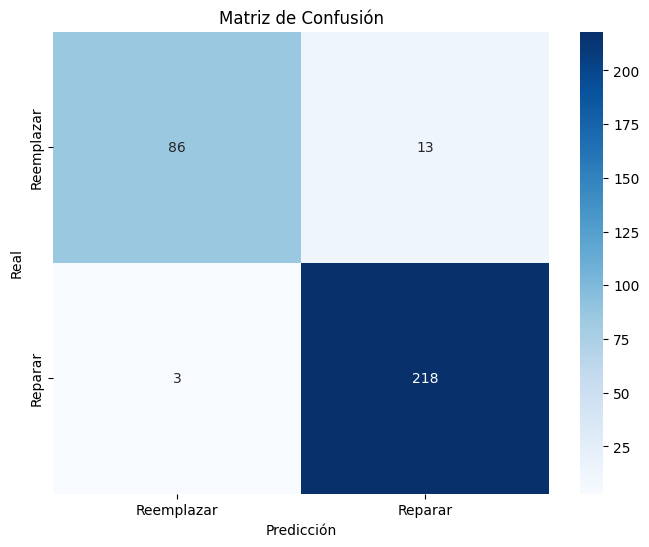

In [9]:
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el modelo y los label encoders
model = joblib.load('modelo_entrenado_verificacionDannos.pkl')
label_encoders = joblib.load('label_encoders_verificacionDannos.pkl')

# 2. Cargar los datos de prueba (X_test y y_test)
# Si no los tienes en memoria, puedes cargarlos desde un archivo o generarlos nuevamente
# X_test = ...
# y_test = ...

# 3. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 4. Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# 5. Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['Sugerencia'].classes_,
            yticklabels=label_encoders['Sugerencia'].classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Mejoras adicionales

    Normalización: Puedes normalizar la matriz de confusión para ver los porcentajes en lugar de los conteos.

    Métricas adicionales: Calcula métricas como precisión, recall y F1-score para obtener más información sobre el rendimiento del modelo.

In [10]:
from sklearn.metrics import classification_report

# Generar un reporte de clasificación
print(classification_report(y_test, y_pred, target_names=label_encoders['Sugerencia'].classes_))

              precision    recall  f1-score   support

  Reemplazar       0.97      0.87      0.91        99
     Reparar       0.94      0.99      0.96       221

    accuracy                           0.95       320
   macro avg       0.96      0.93      0.94       320
weighted avg       0.95      0.95      0.95       320



6. Cargar y usar el modelo

Cuando necesites usar el modelo, puedes cargarlo y hacer predicciones.

In [ ]:
# Cargar el modelo y los encoders
model = joblib.load('modelo_entrenado_verificacionDannos.pkl')
label_encoders = joblib.load('label_encoders_verificacionDannos.pkl')

# Ejemplo de predicción
nuevos_datos = pd.DataFrame({
    'Tipos de Daño': ['Arañazo'],
    'Piezas del Vehículo': ['Parachoques delantero']
})

# Codificar los nuevos datos
nuevos_datos['Tipos de Daño'] = label_encoders['Tipos de Daño'].transform(nuevos_datos['Tipos de Daño'])
nuevos_datos['Piezas del Vehículo'] = label_encoders['Piezas del Vehículo'].transform(nuevos_datos['Piezas del Vehículo'])

# Hacer la predicción
prediccion = model.predict(nuevos_datos)

# Decodificar la predicción
prediccion_decodificada = label_encoders['Sugerencia'].inverse_transform(prediccion)
print(f'Sugerencia: {prediccion_decodificada[0]}')

7. Mejoras adicionales

    Feature Engineering: Puedes crear nuevas características a partir de las existentes para mejorar el modelo.

    Optimización de hiperparámetros: Usa técnicas como Grid Search o Random Search para encontrar los mejores hiperparámetros para tu modelo.

    Validación cruzada: Usa cross_val_score para evaluar el modelo de manera más robusta.

---
1. Preparación de datos

Primero, necesitas cargar y preprocesar las imágenes. Aquí tienes un ejemplo de cómo hacerlo:

In [ ]:
# Rutas a las carpetas de entrenamiento y validación
train_dir = 'ruta/a/tus/datos/entrenamiento'
validation_dir = 'ruta/a/tus/datos/validacion'

# Preprocesamiento y aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizar los valores de píxeles a [0, 1]
    rotation_range=20,  # Rotación aleatoria
    width_shift_range=0.2,  # Desplazamiento horizontal
    height_shift_range=0.2,  # Desplazamiento vertical
    shear_range=0.2,  # Deformación
    zoom_range=0.2,  # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal
    fill_mode='nearest'  # Rellenar píxeles faltantes
)

validation_datagen = ImageDataGenerator(rescale=1./255)  # Solo normalización para validación

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Redimensionar imágenes
    batch_size=32,
    class_mode='categorical'  # Para clasificación múltiple
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

2. Construcción del modelo

Puedes usar una CNN desde cero o un modelo preentrenado como MobileNet, ResNet, etc. Aquí te dejo un ejemplo de una CNN simple:

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 clases de daños
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

3. Entrenamiento

Entrena el modelo con los generadores de datos:

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

4. Guardar el modelo

Una vez entrenado, guarda el modelo para usarlo más tarde:

In [ ]:
model.save('modelo_danios_vehiculo.h5')

5. Cargar y usar el modelo

Para usar el modelo guardado en otro script o en producción:

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo
model = load_model('modelo_danios_vehiculo.h5')

# Preprocesar una nueva imagen
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'ruta/a/tu/imagen.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión del batch
img_array /= 255.0  # Normalizar

# Predecir
predictions = model.predict(img_array)
class_index = np.argmax(predictions, axis=1)
print(f"Clase predicha: {class_index}")

### Mejoras y recomendaciones:
- Transfer Learning: Usa un modelo preentrenado como MobileNet o ResNet para mejorar el rendimiento.
- Aumento de datos: Aumenta el tamaño del dataset con más transformaciones.
- Fine-Tuning: Ajusta hiperparámetros como el learning rate o el número de capas.
- Evaluación: Usa una matriz de confusión para evaluar el rendimiento por clase.
---

---
---
### Lista de encabezados
1. Piezas del Vehículo:
- 1:"Antiniebla delantero derecho", 2:"Antiniebla delantero izquierdo", 3:"Asiento", 4:"Brazo del techo", 5:"Brazo transversal", 6:"Capó", 7:"Cerradura capo", 8:"Cerradura Maletero", 9:"Cerradura puerta", 10:"Espejo lateral derecho", 11:"Espejo lateral izquierdo", 12:"Espejo retrovisor", 13:"Faros derecho", 14:"Faros izquierdo", 15:"Guardabarros delantero derecho", 16:"Guardabarros delantero izquierdo", 
17:"Guardabarros trasero derecho", 18:"Guardabarros trasero izquierdo", 19:"Limpiaparabrisas", 20:"Luz indicadora delantera derecha", 21:"Luz indicadora delantera izquierda", 22:"Luz indicadora trasera derecha", 23:"Luz indicadora trasera izquierda", 24:"Luz trasera derecho", 
25:"Luz trasera izquierdo", 26:"Maletero", 27:"Manija derecha", 28:"Manija izquierda", 29:"Marco de la ventana", 30:"Marco de las puertas", 31:"Matrícula", 32:"Moldura capó", 33:"Moldura maletro", 34:"Moldura puerta delantera derecha", 35:"Moldura puerta delantera izquierda", 
36:"Moldura puerta trasera derecha", 37:"Moldura puerta trasera izquierda", 38:"Parabrisas delantero", 39:"Parabrisas trasero", 40:"Parachoques delantero", 41:"Parachoques trasero", 42:"Poste del techo", 43:"Puerta delantera derecha", 44:"Puerta delantera izquierda", 45:"Puerta trasera derecha", 46:"Puerta trasera izquierda", 47:"Radiador", 48:"Rejilla o parrilla", 49:"Rueda", 50:"Silenciador o mofle", 51:"Tapa de combustible", 52:"Tapa de rueda", 53:"Techo", 54:"Techo corredizo", 55:"Ventana delantera derecha", 56:"Ventana delantera izquierda", 57:"Ventana trasera derecha", 58:"Ventana trasera izquierda", 59:"Ventanilla delantera derecha", 60:"Ventanilla delantera izquierda", 61:"Ventanilla trasera derecha", 62:"Ventanilla trasera izquierda", 63:"Volante"     
---
2. Tipos de Daño:
- 1:"Abolladura", 2:"Arañazo", 3:"Corrosión", 4:"Deformación", 
5:"Desprendimiento", 6:"Fractura", 7:"Rayón", 8:"Rotura"
---
3. Sugerencia:
- 1:"Reparar", 
2:"Reemplazar"

In [2]:
import pandas as pd

1. Diccionarios completos: Todos los mapeos completos para piezas, daños y sugerencias.

In [3]:
# =============================================
# 1. DICCIONARIOS COMPLETOS DE MAPEO (CORREGIDOS)
# =============================================

# Diccionario para Piezas del Vehículo (completo y corregido)
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Asiento",
    4: "Brazo del techo",
    5: "Brazo transversal",
    6: "Capó",
    7: "Cerradura capo",
    8: "Cerradura maletero",
    9: "Cerradura puerta",
    10: "Espejo lateral derecho",
    11: "Espejo lateral izquierdo",
    12: "Espejo retrovisor",
    13: "Faros derecho",
    14: "Faros izquierdo",
    15: "Guardabarros delantero derecho",
    16: "Guardabarros delantero izquierdo",
    17: "Guardabarros trasero derecho",
    18: "Guardabarros trasero izquierdo",
    19: "Limpiaparabrisas",
    20: "Luz indicadora delantera derecha",
    21: "Luz indicadora delantera izquierda",
    22: "Luz indicadora trasera derecha",
    23: "Luz indicadora trasera izquierda",
    24: "Luz trasera derecho",
    25: "Luz trasera izquierdo",
    26: "Maletero",
    27: "Manija derecha",
    28: "Manija izquierda",
    29: "Marco de la ventana",
    30: "Marco de las puertas",
    31: "Matrícula",
    32: "Moldura capó",
    33: "Moldura maletro",
    34: "Moldura puerta delantera derecha",
    35: "Moldura puerta delantera izquierda",
    36: "Moldura puerta trasera derecha",
    37: "Moldura puerta trasera izquierda",
    38: "Parabrisas delantero",
    39: "Parabrisas trasero",
    40: "Parachoques delantero",
    41: "Parachoques trasero",
    42: "Poste del techo",
    43: "Puerta delantera derecha",
    44: "Puerta delantera izquierda",
    45: "Puerta trasera derecha",
    46: "Puerta trasera izquierda",
    47: "Radiador",
    48: "Rejilla, parrilla",
    49: "Rueda",
    50: "Silenciador, el mofle",
    51: "Tapa de combustible",
    52: "Tapa de rueda",
    53: "Techo",
    54: "Techo corredizo",
    55: "Ventana delantera derecha",
    56: "Ventana delantera izquierda",
    57: "Ventana trasera derecha",
    58: "Ventana trasera izquierda",
    59: "Ventanilla delantera derecha",
    60: "Ventanilla delantera izquierda",
    61: "Ventanilla trasera derecha",
    62: "Ventanilla trasera izquierda",
    63: "Volante"
}

# Diccionario para Tipos de Daño (completo)
label_to_cls_danos = {
    1: "Abolladura",
    2: "Arañazo",
    3: "Corrosión",
    4: "Deformación",
    5: "Desprendimiento",
    6: "Fractura",
    7: "Rayón",
    8: "Rotura"
}

# Diccionario para Sugerencia (completo)
label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}


2. Procesamiento robusto:
    - Limpieza de texto (minúsculas, eliminar espacios)
    - Manejo de valores compuestos (ej. "Abolladura-dent")
    - Manejo de errores y valores no encontrados

In [3]:
# Crear diccionarios inversos (texto -> número)
cls_to_label_piezas = {v.lower().strip(): k for k, v in label_to_cls_piezas.items()}
cls_to_label_danos = {v.lower().strip(): k for k, v in label_to_cls_danos.items()}
cls_to_label_sugerencia = {v.lower().strip(): k for k, v in label_to_cls_sugerencia.items()}

3. Validación de datos:
    - Detección y reporte de valores que no se pudieron mapear
    - Verificación de conteo de registros

4. Manejo de casos especiales:
    - Valores nulos o faltantes
    - Texto con formatos inconsistentes

In [4]:
# =============================================
# 2. FUNCIONES DE PROCESAMIENTO
# =============================================

def limpiar_texto(texto):
    """Limpia y estandariza el texto para comparación"""
    if pd.isna(texto):
        return ""
    return texto.lower().strip()

def procesar_dano(texto):
    """Procesa la columna Tipos de Daño (maneja casos como 'Abolladura-dent')"""
    texto = limpiar_texto(texto)
    if '-' in texto:
        return texto.split('-')[0]
    return texto

def mapear_valor(texto, diccionario, columna):
    """Mapea texto a valor numérico con manejo de errores"""
    try:
        texto = limpiar_texto(texto)
        if columna == 'Tipos de Daño':
            texto = procesar_dano(texto)
        return diccionario.get(texto, -1)  # -1 para valores no encontrados
    except Exception as e:
        print(f"Error procesando valor: {texto} - {str(e)}")
        return -1

5. Metadatos útiles:
    - Reporte de valores no encontrados
    - Confirmación del proceso completado

In [5]:
# =============================================
# 3. PROCESAR EL ARCHIVO CSV
# =============================================

# Leer el archivo original (ajusta el separador según tu archivo)
df = pd.read_csv('data/fotos_siniestros/clasificacion_fotos_siniestros_partes.csv', sep='|')

# Aplicar el mapeo a cada columna
df['Tipos de Daño_encoded'] = df['Tipos de Daño'].apply(
    lambda x: mapear_valor(x, cls_to_label_danos, 'Tipos de Daño'))
df['Piezas del Vehículo_encoded'] = df['Piezas del Vehículo'].apply(
    lambda x: mapear_valor(x, cls_to_label_piezas, 'Piezas del Vehículo'))
df['Sugerencia_encoded'] = df['Sugerencia'].apply(
    lambda x: mapear_valor(x, cls_to_label_sugerencia, 'Sugerencia'))

# Verificar valores no mapeados (-1)
for col in ['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']:
    no_encontrados = df[df[f'{col}_encoded'] == -1][col].unique()
    if len(no_encontrados) > 0:
        print(f"\nADVERTENCIA: Valores no mapeados en {col}:")
        print(no_encontrados)

In [6]:
# =============================================
# 4. CREAR NUEVO CSV CON ETIQUETAS
# =============================================

# Seleccionar y renombrar columnas
df_encoded = df[[
    'Imagen',
    'Tipos de Daño_encoded',
    'Piezas del Vehículo_encoded',
    'Sugerencia_encoded'
]].rename(columns={
    'Tipos de Daño_encoded': 'Tipos de Daño',
    'Piezas del Vehículo_encoded': 'Piezas del Vehículo',
    'Sugerencia_encoded': 'Sugerencia'
})

# Guardar el nuevo archivo CSV
df_encoded.to_csv('data/fotos_siniestros/datos_vehiculos_encoded.csv', index=False, sep='|')

print("\nProceso completado exitosamente!")
print(f"Archivo original: {len(df)} registros")
print(f"Archivo codificado: {len(df_encoded)} registros")
print("Nuevo archivo guardado como: datos_vehiculos_encoded.csv")


Proceso completado exitosamente!
Archivo original: 1601 registros
Archivo codificado: 1601 registros
Nuevo archivo guardado como: datos_vehiculos_encoded.csv


Separar los datos para entrenamientos y pruebas.

- Manejo de imágenes múltiples: Agrupa y consolida correctamente imágenes con múltiples registros (como 9.jpg y 15.jpg en tu ejemplo).

- División estratificada: Mantiene proporciones similares de clases en todos los conjuntos, especialmente para la columna "Sugerencia".

- Reconstrucción precisa: Después de la división, expande los registros para mantener la estructura original del CSV.

- Validación incluida: Crea tres conjuntos (entrenamiento, validación y prueba) con proporciones 60%-20%-20%.

- Reporte detallado: Genera estadísticas de distribución para cada conjunto.

- Semilla aleatoria: Garantiza reproducibilidad en las divisiones.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Configuración
SEED = 42
TEST_SIZE = 0.2  # 20% para prueba
VAL_SIZE = 0.25  # 25% del entrenamiento para validación (20% del total)

# 1. Cargar los datos codificados
df = pd.read_csv('data/fotos_siniestros/datos_vehiculos_encoded.csv', sep='|')

In [8]:
# 2. Manejar imágenes con múltiples registros (como 9.jpg, 15.jpg)
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    return pd.Series({
        'Tipos de Daño': list(group['Tipos de Daño'].unique()),
        'Piezas del Vehículo': list(group['Piezas del Vehículo'].unique()),
        'Sugerencia': list(group['Sugerencia'].unique())
    })

df_consolidado = df.groupby('Imagen').apply(consolidar_etiquetas).reset_index()

/tmp/ipykernel_171861/862122714.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_consolidado = df.groupby('Imagen').apply(consolidar_etiquetas).reset_index()


Combinar categorías raras en Tipos de Daño

    - Tienes 8 tipos de daño en label_to_cls_danos (clases 1-8)
    - Pero se agrega una clase 99 ("Otros daños")

In [ ]:
# umbral = 0.03  # 3% del total (ajusta según tu análisis)
# counts = df['Tipos de Daño'].value_counts(normalize=True)

# # Crear nueva columna conservando las categorías frecuentes
# df['Tipos de Daño_balanced'] = df['Tipos de Daño'].apply(
#     lambda x: x if counts[x] > umbral else 99  # 99 será "Otros"
# )

# # Opcional: Actualizar el diccionario label_to_cls_danos
# label_to_cls_danos[99] = "Otros daños"

In [9]:
# 3. Dividir los datos
# Primero dividimos en entrenamiento+validación (80%) y prueba (20%)
train_val_df, test_df = train_test_split(
    df_consolidado,
    test_size=TEST_SIZE,
    random_state=SEED,
    stratify=df_consolidado['Sugerencia'].apply(lambda x: x[0])  # Estratificar por primera sugerencia
)

In [10]:
# Luego dividimos el entrenamiento en entrenamiento (60%) y validación (20%)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=VAL_SIZE/(1-TEST_SIZE),  # Ajustar para que sea 20% del total
    random_state=SEED,
    stratify=train_val_df['Sugerencia'].apply(lambda x: x[0])
)

In [11]:
# 4. Reconstruir los DataFrames originales (desagrupar las listas)
def expandir_registros(df):
    records = []
    for _, row in df.iterrows():
        for tipo in row['Tipos de Daño']:
            for pieza in row['Piezas del Vehículo']:
                for sugerencia in row['Sugerencia']:
                    records.append({
                        'Imagen': row['Imagen'],
                        'Tipos de Daño': tipo,
                        'Piezas del Vehículo': pieza,
                        'Sugerencia': sugerencia
                    })
    return pd.DataFrame(records)# Aplicar oversampling con SMOTE

# Aplicar oversampling con SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(df[['Tipos de Daño', 'Piezas del Vehículo']], df['Sugerencia'])

train_expanded = expandir_registros(train_df)
val_expanded = expandir_registros(val_df)
test_expanded = expandir_registros(test_df)

In [12]:
# 5. Guardar los conjuntos de datos
os.makedirs('data/fotos_siniestros/datasets', exist_ok=True)

train_expanded.to_csv('data/fotos_siniestros/datasets/train.csv', index=False, sep='|')
val_expanded.to_csv('data/fotos_siniestros/datasets/val.csv', index=False, sep='|')
test_expanded.to_csv('data/fotos_siniestros/datasets/test.csv', index=False, sep='|')

Pesos de clase para 'Piezas del Vehículo'

In [ ]:
# from torch.utils.data import WeightedRandomSampler

# # Calcular pesos para balancear Piezas del Vehículo
# def get_weights(df, target_col):
#     class_counts = df[target_col].value_counts().sort_index()
#     weights = 1. / class_counts
#     samples_weights = weights[df[target_col]].values
#     return torch.DoubleTensor(samples_weights)

# # Aplicar solo al conjunto de entrenamiento
# train_weights = get_weights(train_df, 'Piezas del Vehículo')
# sampler = WeightedRandomSampler(
#     weights=train_weights,
#     num_samples=len(train_weights),
#     replacement=True
# )

# # Modificar el DataLoader de entrenamiento
# train_dl = DataLoader(
#     train_dataset,
#     batch_size=batch_size,
#     sampler=sampler,  # ¡No usar shuffle=True con sampler!
#     num_workers=os.cpu_count()
# )

In [ ]:
# 6. Generar reporte de distribución
def generar_reporte(df, nombre):
    print(f"\nDistribución en {nombre}:")
    print(f"- Total registros: {len(df)}")
    print(f"- Imágenes únicas: {df['Imagen'].nunique()}")
    print("Distribución de sugerencias:")
    print(df['Sugerencia'].value_counts(normalize=True))
    print("\nDistribución de tipos de daño:")
    print(df['Tipos de Daño'].value_counts(normalize=True))
    print("\nDistribución de piezas (top 10):")
    print(df['Piezas del Vehículo'].value_counts(normalize=True).head(10))

generar_reporte(train_expanded, "Entrenamiento")
generar_reporte(val_expanded, "Validación")
generar_reporte(test_expanded, "Prueba")

print("\nProceso completado. Archivos guardados en:")
print("- data/fotos_siniestros/datasets/train.csv")
print("- data/fotos_siniestros/datasets/val.csv")
print("- data/fotos_siniestros/datasets/test.csv")

Análisis exhaustivo de la distribución de las clases en cada categoría (Tipos de Daño, Piezas del Vehículo y Sugerencia).

Esto permitira saber si el dataset esta balanceado o no, si no esta balanceado se pueden ajustar Para datasets desbalanceados se puede modificar el parámetro stratify.

Método 1: Análisis Estadístico Básico

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('data/fotos_siniestros/datos_vehiculos_encoded.csv', sep='|')

# 1. Análisis para 'Sugerencia'
sugerencia_dist = df['Sugerencia'].value_counts(normalize=True)
print("Distribución de Sugerencias:")
print(sugerencia_dist)

# 2. Análisis para 'Tipos de Daño'
danos_dist = df['Tipos de Daño'].value_counts(normalize=True)
print("\nDistribución de Tipos de Daño:")
print(danos_dist)

# 3. Análisis para 'Piezas del Vehículo' (top 20)
piezas_dist = df['Piezas del Vehículo'].value_counts(normalize=True)
print("\nDistribución de Piezas (Top 20):")
print(piezas_dist.head(20))

Distribución de Sugerencias:
Sugerencia
1    0.700812
2    0.299188
Name: proportion, dtype: float64

Distribución de Tipos de Daño:
Tipos de Daño
1    0.329794
8    0.306059
2    0.187383
4    0.063710
5    0.039975
6    0.037477
7    0.033104
3    0.002498
Name: proportion, dtype: float64

Distribución de Piezas (Top 20):
Piezas del Vehículo
40    0.191755
41    0.109931
38    0.076202
16    0.061212
15    0.058089
49    0.049969
6     0.045597
18    0.038101
13    0.034978
17    0.033729
44    0.033104
14    0.031230
46    0.028107
45    0.027483
30    0.026858
43    0.026234
25    0.023735
26    0.016240
24    0.015615
39    0.012492
Name: proportion, dtype: float64


Método 2: Visualización Gráfica

In [ ]:
# Configurar el estilo de los gráficos
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

# 1. Gráfico para Sugerencia
plt.subplot(3, 1, 1)
df['Sugerencia'].map({1: 'Reparar', 2: 'Reemplazar'}).value_counts().plot(kind='bar')
plt.title('Distribución de Sugerencias')
plt.xlabel('Sugerencia')
plt.ylabel('Cantidad')

# 2. Gráfico para Tipos de Daño
plt.subplot(3, 1, 2)
df['Tipos de Daño'].map(label_to_cls_danos).valuescikit-learn_counts().plot(kind='bar')
plt.title('Distribución de Tipos de Daño')
plt.xlabel('Tipo de Daño')
plt.ylabel('Cantidad')

# 3. Gráfico para Piezas (Top 15)
plt.subplot(3, 1, 3)
df['Piezas del Vehículo'].map(label_to_cls_piezas).value_counts().head(15).plot(kind='bar')
plt.title('Distribución de Piezas (Top 15)')
plt.xlabel('Pieza del Vehículo')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

Método 3: Análisis de Desbalanceo con Métricas

In [ ]:
from sklearn.metrics import class_weight
import numpy as np

# Calcular pesos de clase para cada categoría
def calcular_desbalanceo(columna):
    clases = df[columna].unique()
    conteos = df[columna].value_counts().sort_index()
    desbalanceo = conteos.max() / conteos.min()
    pesos = class_weight.compute_class_weight('balanced', classes=clases, y=df[columna])
    
    print(f"\nAnálisis de desbalanceo para {columna}:")
    print(f"Ratio máximo de desbalanceo: {desbalanceo:.2f}:1")
    print("Distribución absoluta:")
    print(conteos)
    print("\nDistribución porcentual:")
    print((conteos/len(df)*100).round(2))
    print("\nPesos sugeridos para balanceo:")
    print(dict(zip(clases, pesos)))

calcular_desbalanceo('Sugerencia')
calcular_desbalanceo('Tipos de Daño')
calcular_desbalanceo('Piezas del Vehículo')

- Sugerencia:
    - Si una categoría (ej. "Reparar") tiene >70% de los datos, hay desbalanceo significativo.
    - Ratio > 3:1 (ej. 75% vs 25%) se considera problemático.
    
    Distribución de Sugerencias:
    - 1 -> Reparar ->    0.700812
    - 2 -> Reemplazar ->   0.299188

- Tipos de Daño:
    - Busca categorías con menos del 5% de representación.
    - Si el ratio entre el más común y el menos común es > 10:1, es crítico.

- Piezas del Vehículo:
    - Piezas con < 1% de aparición son candidatas a agruparse en "Otras".
    - Si el top 5 piezas concentra >80% de los datos, hay alta desproporción.

---
---
Características clave de esta implementación:

    Modelo Multitarea: Un único modelo que predice:
        Tipo de daño
        Pieza afectada
        Sugerencia (Reparar/Reemplazar)

    Manejo de desbalanceo:
        WeightedRandomSampler en el DataLoader
        Pesos en las funciones de pérdida
        Oversampling con SMOTE

    Matrices de Confusión:
        Una para cada tarea (daño, pieza, sugerencia)
        Visualización clara con seaborn
        Reportes de clasificación completos

    Optimizaciones:
        Modelo EfficientNet preentrenado
        Ajuste fino (fine-tuning) de todas las capas
        Programador de tasa de aprendizaje

    Persistencia:
        Guardado del mejor modelo durante entrenamiento
        Guardado final con todos los metadatos

Recomendaciones adicionales:

    Para mejorar precisión:
        Aumentar el tamaño del modelo (EfficientNet-B3 o B4)
        Usar aumentación de datos más agresiva
        Ajustar los pesos de clases según tu análisis

    Para producción:
        Convertir a TorchScript con torch.jit.script
        Crear una API Flask/FastAPI para servir el modelo
        Implementar un sistema de caché para predicciones frecuentes

    Para monitoreo:
        Integrar TensorBoard para visualización
        Guardar métricas en cada época
        Implementar early stopping

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from torch.utils.data import WeightedRandomSampler
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# =============================================
# 1. DICCIONARIOS COMPLETOS DE MAPEO (CORREGIDOS)
# =============================================

# Diccionario para Piezas del Vehículo (completo y corregido)
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Asiento",
    4: "Brazo del techo",
    5: "Brazo transversal",
    6: "Capó",
    7: "Cerradura capo",
    8: "Cerradura maletero",
    9: "Cerradura puerta",
    10: "Espejo lateral derecho",
    11: "Espejo lateral izquierdo",
    12: "Espejo retrovisor",
    13: "Faros derecho",
    14: "Faros izquierdo",
    15: "Guardabarros delantero derecho",
    16: "Guardabarros delantero izquierdo",
    17: "Guardabarros trasero derecho",
    18: "Guardabarros trasero izquierdo",
    19: "Limpiaparabrisas",
    20: "Luz indicadora delantera derecha",
    21: "Luz indicadora delantera izquierda",
    22: "Luz indicadora trasera derecha",
    23: "Luz indicadora trasera izquierda",
    24: "Luz trasera derecho",
    25: "Luz trasera izquierdo",
    26: "Maletero",
    27: "Manija derecha",
    28: "Manija izquierda",
    29: "Marco de la ventana",
    30: "Marco de las puertas",
    31: "Matrícula",
    32: "Moldura capó",
    33: "Moldura maletro",
    34: "Moldura puerta delantera derecha",
    35: "Moldura puerta delantera izquierda",
    36: "Moldura puerta trasera derecha",
    37: "Moldura puerta trasera izquierda",
    38: "Parabrisas delantero",
    39: "Parabrisas trasero",
    40: "Parachoques delantero",
    41: "Parachoques trasero",
    42: "Poste del techo",
    43: "Puerta delantera derecha",
    44: "Puerta delantera izquierda",
    45: "Puerta trasera derecha",
    46: "Puerta trasera izquierda",
    47: "Radiador",
    48: "Rejilla, parrilla",
    49: "Rueda",
    50: "Silenciador, el mofle",
    51: "Tapa de combustible",
    52: "Tapa de rueda",
    53: "Techo",
    54: "Techo corredizo",
    55: "Ventana delantera derecha",
    56: "Ventana delantera izquierda",
    57: "Ventana trasera derecha",
    58: "Ventana trasera izquierda",
    59: "Ventanilla delantera derecha",
    60: "Ventanilla delantera izquierda",
    61: "Ventanilla trasera derecha",
    62: "Ventanilla trasera izquierda",
    63: "Volante"
}

## Diccionario para Tipos de Daño (completo)
label_to_cls_danos = {
    1: "Abolladura",
    2: "Arañazo",
    3: "Corrosión",
    4: "Deformación",
    5: "Desprendimiento",
    6: "Fractura",
    7: "Rayón",
    8: "Rotura"
}
## Diccionario para Tipos de Daño (completo)
# label_to_cls_danos = {
#     0: "Abolladura",
#     1: "Arañazo",
#     2: "Corrosión",
#     3: "Deformación",
#     4: "Desprendimiento",
#     5: "Fractura",
#     6: "Rayón",
#     7: "Rotura"
# }

# Diccionario para Sugerencia (completo)
label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}

batch_size = 32  # Definir el tamaño de batch como variable global

# =============================================
# 2. CONFIGURACIÓN INICIAL
# =============================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
torch.manual_seed(SEED)

# =============================================
# 3. CLASE DATASET PERSONALIZADA
# =============================================
class VehiculoDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file, sep='|')
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    # def __getitem__(self, idx):
    #     img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
    #     image = Image.open(img_name).convert('RGB')
        
    #     # Obtener múltiples etiquetas
    #     dano = torch.tensor(self.data.iloc[idx, 1], dtype=torch.long)
    #     pieza = torch.tensor(self.data.iloc[idx, 2], dtype=torch.long)
    #     sugerencia = torch.tensor(self.data.iloc[idx, 3], dtype=torch.long)
        
    #     if self.transform:
    #         image = self.transform(image)
            
    #     return image, {'dano': dano, 'pieza': pieza, 'sugerencia': sugerencia}

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        
        # Ajustar etiquetas para que empiecen en 0
        dano = torch.tensor(self.data.iloc[idx, 1] - 1, dtype=torch.long)  # Restar 1
        pieza = torch.tensor(self.data.iloc[idx, 2] - 1, dtype=torch.long)  # Restar 1
        sugerencia = torch.tensor(self.data.iloc[idx, 3] - 1, dtype=torch.long)  # Restar 1
        
        if self.transform:
            image = self.transform(image)
            
        return image, {'dano': dano, 'pieza': pieza, 'sugerencia': sugerencia}

# =============================================
# 4. TRANSFORMACIONES Y DATALOADERS
# =============================================
# Transformaciones (ajusta según necesites)
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Crear datasets
image_dir = 'data/fotos_siniestros/'  # Ajusta la ruta
train_dataset = VehiculoDataset(
    csv_file='data/fotos_siniestros/datasets/train.csv',
    root_dir=image_dir,
    transform=data_transforms['train']
)
val_dataset = VehiculoDataset(
    csv_file='data/fotos_siniestros/datasets/val.csv',
    root_dir=image_dir,
    transform=data_transforms['val']
)

# =============================================
# 5. MODELO MULTITAREA
# =============================================
class MultiTaskModel(nn.Module):
    def __init__(self, num_danos, num_piezas, num_sugerencias):
        super(MultiTaskModel, self).__init__()
        
        self.base_model = models.efficientnet_b0(pretrained=True)
        in_features = self.base_model.classifier[1].in_features
        
        # Asegurar que las salidas coincidan con el número real de clases
        self.dano_head = nn.Linear(in_features, num_danos)  # 8 o 9
        self.pieza_head = nn.Linear(in_features, num_piezas)  # 63
        self.sugerencia_head = nn.Linear(in_features, num_sugerencias)  # 2
        
        self.base_model.classifier = nn.Identity()
        
    def forward(self, x):
        features = self.base_model(x)
        return {
            'dano': self.dano_head(features),
            'pieza': self.pieza_head(features),
            'sugerencia': self.sugerencia_head(features)
        }

# Recrear el modelo con el número correcto de clases
model = MultiTaskModel(
    num_danos=8,  # Cambiar a 9 si incluyes "Otros daños"
    num_piezas=63,
    num_sugerencias=2
).to(device)

# =============================================
# 6. FUNCIÓN DE PÉRDIDA Y OPTIMIZADOR (VERSIÓN COMPLETA)
# =============================================
num_danos = len(label_to_cls_danos)  # 8 clases
num_piezas = len(label_to_cls_piezas)  # 63
num_sugerencias = len(label_to_cls_sugerencia)  # 2

# Pesos para clases desbalanceadas
dano_weights = torch.tensor([1.0, 1.0, 2.0, 1.5, 3.0, 2.5, 2.0, 1.8], device=device)

criterion = {
    'dano': nn.CrossEntropyLoss(weight=dano_weights),
    'pieza': nn.CrossEntropyLoss(weight=None),  # Sin pesos para piezas
    'sugerencia': nn.CrossEntropyLoss()
}

# Definir el optimizador y scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

/data/Python/VehiculosVerificationDeDannosEtiquetas/.venv/lib64/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/Python/VehiculosVerificationDeDannosEtiquetas/.venv/lib64/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
# =============================================
# 7. TRANSFORMACIONES Y DATALOADERS (VERSIÓN CORREGIDA)
# =============================================
##batch_size = 32  # Definir el tamaño de batch como variable global

# Crear dataloaders sin sampler inicialmente
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # Temporal, será reemplazado por el sampler
    num_workers=4,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

# =============================================
# 8. ENTRENAMIENTO Y VALIDACIÓN (VERSIÓN CORREGIDA)
# =============================================
def get_weights(df, target_column):
    """Calcula los pesos para el muestreo ponderado basado en la distribución de clases."""
    # Contar las ocurrencias de cada clase
    class_counts = df[target_column].value_counts().to_dict()
    
    # Calcular el peso para cada muestra: 1 / frecuencia de su clase
    weights = [1.0 / class_counts[cls] for cls in df[target_column]]
    
    # Convertir a tensor
    return torch.tensor(weights, dtype=torch.float)

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    best_acc = 0.0
    batch_size=32
    
    # Cargar datos de entrenamiento para calcular pesos
    train_df = pd.read_csv('data/fotos_siniestros/datasets/train.csv', sep='|')
    
    # Configurar el sampler ponderado para el entrenamiento
    train_weights = get_weights(train_df, 'Piezas del Vehículo')
    train_sampler = WeightedRandomSampler(
        weights=train_weights,
        num_samples=len(train_weights),
        replacement=True
    )
    
    # Recrear el DataLoader de entrenamiento con el sampler
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,  # Usar la variable global
        sampler=train_sampler,
        num_workers=4,
        pin_memory=True
    )
    
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader
            
            running_loss = 0.0
            running_corrects = {'dano': 0, 'pieza': 0, 'sugerencia': 0}
            total_samples = 0
            
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = {k: v.to(device) for k, v in labels.items()}
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    
                    # Calcular pérdidas individuales
                    loss_dano = criterion['dano'](outputs['dano'], labels['dano'])
                    loss_pieza = criterion['pieza'](outputs['pieza'], labels['pieza'])
                    loss_sugerencia = criterion['sugerencia'](outputs['sugerencia'], labels['sugerencia'])
                    
                    # Pérdida total ponderada
                    total_loss = 0.4*loss_dano + 0.3*loss_pieza + 0.3*loss_sugerencia
                    
                    if phase == 'train':
                        total_loss.backward()
                        optimizer.step()
                
                # Estadísticas
                batch_size = inputs.size(0)
                running_loss += total_loss.item() * batch_size
                total_samples += batch_size
                
                for task in ['dano', 'pieza', 'sugerencia']:
                    _, preds = torch.max(outputs[task], 1)
                    running_corrects[task] += (preds == labels[task]).sum().item()
            
            if phase == 'train':
                scheduler.step()
            
            # Calcular métricas
            epoch_loss = running_loss / total_samples
            epoch_acc = {task: acc/total_samples for task, acc in running_corrects.items()}
            
            # Mostrar resultados
            print(f'{phase.upper()} - Loss: {epoch_loss:.4f}')
            for task, acc in epoch_acc.items():
                print(f'{task.capitalize()} Accuracy: {acc:.4f}')
            
            # Guardar el mejor modelo
            if phase == 'val' and epoch_acc['sugerencia'] > best_acc:
                best_acc = epoch_acc['sugerencia']
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': epoch_loss,
                    'accuracy': best_acc
                }, 'best_model.pth')
                print(f'>>> Mejor modelo guardado (Sugerencia Acc: {best_acc:.4f})')
    
    return model


In [6]:
train_df = pd.read_csv('data/fotos_siniestros/datasets/train.csv', sep='|')
print("Rango original de etiquetas:")
print("Daño:", train_df.iloc[:, 1].min(), "-", train_df.iloc[:, 1].max())
print("Pieza:", train_df.iloc[:, 2].min(), "-", train_df.iloc[:, 2].max())
print("Sugerencia:", train_df.iloc[:, 3].min(), "-", train_df.iloc[:, 3].max())

# Deberías ver rangos 1-8, 1-63 y 1-2 respectivamente
# Después de restar 1 en el Dataset, PyTorch verá 0-7, 0-62 y 0-1

Rango original de etiquetas:
Daño: 1 - 8
Pieza: 1 - 62
Sugerencia: 1 - 2


In [ ]:
# =============================================
# 9. ENTRENAMIENTO DEL MODELO (VERSIÓN CORREGIDA)
# =============================================
# Last Execution 9:36:40 PM
# Execution Time 98m 8.6s
# Overhead Time 139ms
# Render Times
# VS Code Builtin Notebook Output Renderer 10ms
# =============================================
try:
    print("Iniciando entrenamiento...")
    print(f"Device: {device}")
    print(f"Model architecture:\n{model}")
    print(f"Batch size: {batch_size}")
    
    # Llamada corregida (sin el parámetro batch_size)
    model = train_model(model, criterion, optimizer, scheduler, num_epochs=25)
    
    print("¡Entrenamiento completado exitosamente!")
    print("El mejor modelo fue guardado como 'best_model.pth'")
    
except Exception as e:
    print(f"\nError durante el entrenamiento: {str(e)}")
    print("Guardando modelo parcial como 'partial_model.pth'...")
    torch.save(model.state_dict(), 'partial_model.pth')
    raise

Iniciando entrenamiento...
Device: cpu
Model architecture:
MultiTaskModel(
  (base_model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
    

TRAIN - Loss: 1.4360
Dano Accuracy: 0.4668
Pieza Accuracy: 0.4004
Sugerencia Accuracy: 0.6564
VAL - Loss: 1.8689
Dano Accuracy: 0.3341
Pieza Accuracy: 0.1850
Sugerencia Accuracy: 0.6424
>>> Mejor modelo guardado (Sugerencia Acc: 0.6424)

Epoch 2/25
----------
TRAIN - Loss: 1.0849
Dano Accuracy: 0.5083
Pieza Accuracy: 0.5452
Sugerencia Accuracy: 0.6601
VAL - Loss: 1.8769
Dano Accuracy: 0.3599
Pieza Accuracy: 0.1390
Sugerencia Accuracy: 0.6323

Epoch 3/25
----------
TRAIN - Loss: 1.0258
Dano Accuracy: 0.5166
Pieza Accuracy: 0.5637
Sugerencia Accuracy: 0.6734
VAL - Loss: 2.0225
Dano Accuracy: 0.3655
Pieza Accuracy: 0.1099
Sugerencia Accuracy: 0.6300

Epoch 4/25
----------
TRAIN - Loss: 0.9228
Dano Accuracy: 0.5567
Pieza Accuracy: 0.6116
Sugerencia Accuracy: 0.6840
VAL - Loss: 1.9467
Dano Accuracy: 0.3049
Pieza Accuracy: 0.1166
Sugerencia Accuracy: 0.6401

Epoch 5/25
----------
TRAIN - Loss: 0.9614
Dano Accuracy: 0.5291
Pieza Accuracy: 0.5992
Sugerencia Accuracy: 0.6688
VAL - Loss: 1.8000


<Figure size 640x480 with 0 Axes>

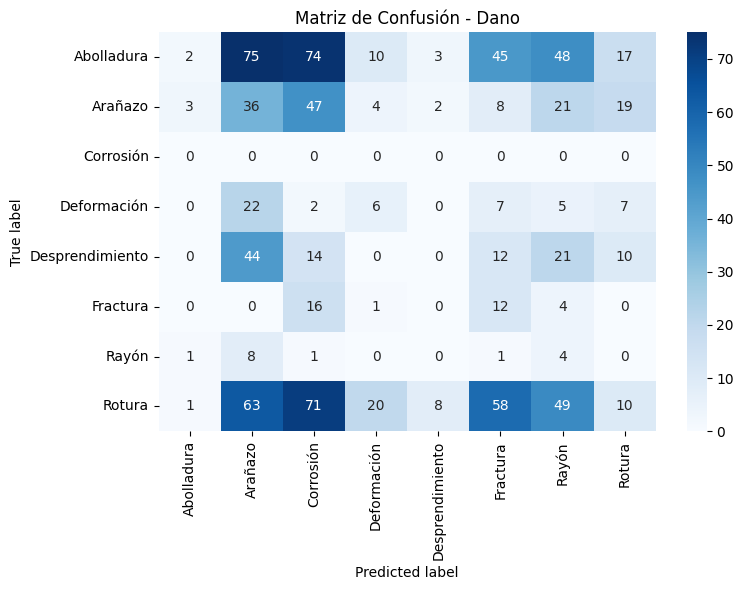


Reporte de Clasificación - Dano:
                 precision    recall  f1-score   support

     Abolladura       0.29      0.01      0.01       274
        Arañazo       0.15      0.26      0.19       140
      Corrosión       0.00      0.00      0.00         0
    Deformación       0.15      0.12      0.13        49
Desprendimiento       0.00      0.00      0.00       101
       Fractura       0.08      0.36      0.14        33
          Rayón       0.03      0.27      0.05        15
         Rotura       0.16      0.04      0.06       280

       accuracy                           0.08       892
      macro avg       0.11      0.13      0.07       892
   weighted avg       0.17      0.08      0.06       892



<Figure size 640x480 with 0 Axes>

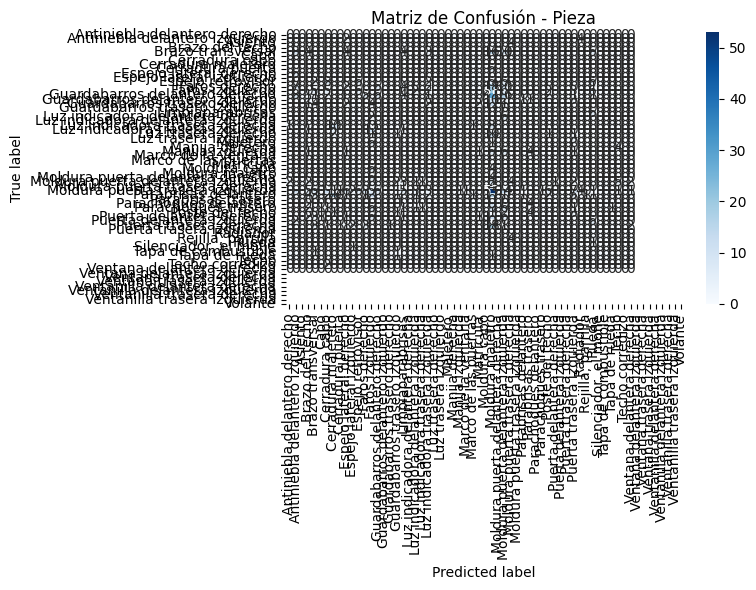


Reporte de Clasificación - Pieza:


ValueError: Number of classes, 55, does not match size of target_names, 63. Try specifying the labels parameter

In [7]:
# =============================================
# 10. MATRIZ DE CONFUSIÓN Y EVALUACIÓN
# =============================================
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Evaluar en el conjunto de validación
model.eval()
all_preds = {'dano': [], 'pieza': [], 'sugerencia': []}
all_labels = {'dano': [], 'pieza': [], 'sugerencia': []}

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        
        for task in ['dano', 'pieza', 'sugerencia']:
            _, preds = torch.max(outputs[task], 1)
            all_preds[task].extend(preds.cpu().numpy())
            all_labels[task].extend(labels[task].cpu().numpy())

# Generar matrices de confusión para cada tarea
tasks = {
    'dano': label_to_cls_danos,
    'pieza': label_to_cls_piezas,
    'sugerencia': label_to_cls_sugerencia
}

for task_name, class_dict in tasks.items():
    cm = confusion_matrix(all_labels[task_name], all_preds[task_name])
    plt.figure()
    plot_confusion_matrix(cm, classes=list(class_dict.values()), 
                         title=f'Matriz de Confusión - {task_name.capitalize()}')
    plt.show()
    
    # Reporte de clasificación
    print(f"\nReporte de Clasificación - {task_name.capitalize()}:")
    print(classification_report(
        all_labels[task_name], 
        all_preds[task_name], 
        target_names=list(class_dict.values()),
        zero_division=0
    ))

# =============================================
# 8. GUARDAR MODELO COMPLETO
# =============================================
torch.save({
    'model_state_dict': model.state_dict(),
    'label_to_cls_piezas': label_to_cls_piezas,
    'label_to_cls_danos': label_to_cls_danos,
    'label_to_cls_sugerencia': label_to_cls_sugerencia
}, 'full_model.pth')

---
---